#  Best Prepaid Plan for Telecom Operator Megaline

# Introduction
I work as an analyst for the telecom operator Megaline.The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. Given  data on 500 Megaline clients for the year 2018, my job is to analyze clients' behavior and determine which prepaid plan brings in more revenue. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-Open-the-data-file-and-study-the-general-information-" data-toc-modified-id="Step-1:-Open-the-data-file-and-study-the-general-information--1">Step 1: Open the data file and study the general information <a class="anchor" id="Step 1"></a></a></span><ul class="toc-item"><li><span><a href="#Interim-Conclusion" data-toc-modified-id="Interim-Conclusion-1.1">Interim Conclusion</a></span></li></ul></li><li><span><a href="#Step-2:-Preparing-the-data" data-toc-modified-id="Step-2:-Preparing-the-data-2">Step 2: Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Converting-the-data-to-the-necessary-types" data-toc-modified-id="Converting-the-data-to-the-necessary-types-2.1">Converting the data to the necessary types</a></span></li><li><span><a href="#Missing-values-and-errors-in-the-data,-new-columns-and-data-merging" data-toc-modified-id="Missing-values-and-errors-in-the-data,-new-columns-and-data-merging-2.2">Missing values and errors in the data, new columns and data merging</a></span></li><li><span><a href="#Interrim-conclusion" data-toc-modified-id="Interrim-conclusion-2.3">Interrim conclusion</a></span></li></ul></li><li><span><a href="#Step-3:-Analyze-the-data" data-toc-modified-id="Step-3:-Analyze-the-data-3">Step 3: Analyze the data</a></span><ul class="toc-item"><li><span><a href="#Describing-the-customers'-behavior" data-toc-modified-id="Describing-the-customers'-behavior-3.1">Describing the customers' behavior</a></span></li><li><span><a href="#Ploting-histograms" data-toc-modified-id="Ploting-histograms-3.2">Ploting histograms</a></span></li><li><span><a href="#Interim-Conclusion" data-toc-modified-id="Interim-Conclusion-3.3">Interim Conclusion</a></span></li></ul></li><li><span><a href="#Step-4:-Testing-the-hypotheses" data-toc-modified-id="Step-4:-Testing-the-hypotheses-4">Step 4: Testing the hypotheses</a></span><ul class="toc-item"><li><span><a href="#Hypothesis--test-1" data-toc-modified-id="Hypothesis--test-1-4.1">Hypothesis  test 1</a></span></li><li><span><a href="#Hypothesis--test-2" data-toc-modified-id="Hypothesis--test-2-4.2">Hypothesis  test 2</a></span></li></ul></li><li><span><a href="#Step-5:-Overall-conclusion" data-toc-modified-id="Step-5:-Overall-conclusion-5">Step 5: Overall conclusion</a></span></li></ul></div>

## Step 1: Open the data file and study the general information <a class="anchor" id="Step 1"></a>
Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from functools import reduce
%matplotlib inline


df_calls=pd.read_csv("megaline_calls.csv")
df_messages=pd.read_csv("megaline_messages.csv")
df_internet=pd.read_csv("megaline_internet.csv")
df_users=pd.read_csv("megaline_users1.csv")
df_plans=pd.read_csv("megaline_plans.csv")

General information, and preview of first/last five rows, description of datasets

In [2]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [3]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [5]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
df_internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [9]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Are the users evenly selected?

In [12]:
df_users["tariff"].value_counts()

surf        339
ultimate    161
Name: tariff, dtype: int64

Majority of the clients selected patronise the surf plan

In [13]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Interim Conclusion
Considering the DataFrames containing `id` columns, the id data type is object instead of integer. This is due to the underscores in-between the digits. Also, all DataFrames with dates are objects but must be in datetime format. 
Aside these, the general information of the datasets looks fine. 
The general information shows only `churn_date` column have missing values in datasets aside the presence of zero(s) in the data.
In 2018, the highest, average, and lowest call duration by a client of Megaline was about 38, 7,and 0 minutes respectively. 
On Average, a client used about 367 megabytes(MB) of data in 2018. The maximum data used by a client was about 1694 MB and the lowest was about 0 MB. 


## Step 2: Preparing the data
### Converting the data to the necessary types

`id columns:`

One obvious observation from the DataFrames' `id` columns is that, the digits before the underscore is the same
as the corresponding `user_id` column value. This means the digits after the underscore are unique. Converting to integers would delete the underscore in the middle and maintain the digits. However, I want to also do away with the `user_id` digits attached. Therefore, before I convert `id` data type to integer, I would retrieve this unique numbers.

In [15]:
import re
retrieve_id = np.vectorize(lambda x: re.sub('.*_',  '' ,   x))
df_calls["id"] = retrieve_id(df_calls["id"])
df_messages["id"] = retrieve_id(df_messages["id"])
df_internet["id"] = retrieve_id(df_internet["id"])
df_internet.head()

,id,user_id,session_date,mb_used
0,13,1000,2018-12-29,89.86
1,204,1000,2018-12-31,0.00
2,379,1000,2018-12-28,660.40
3,413,1000,2018-12-26,270.99
4,442,1000,2018-12-27,880.22


Converting `id` columns to integer

In [16]:
df_calls["id"] = df_calls["id"].astype("int64")
df_messages["id"] = df_messages["id"].astype("int64")
df_internet["id"] = df_internet["id"].astype("int64")
# df_calls.info()
# df_messages.info()
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  int64  
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


`Date columns:`

Coverting date columns in dataset to datetime formates

In [17]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], format= "%Y-%m-%d")
# df_calls.info()
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"],format= "%Y-%m-%d")
#df_messages.info()
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"],format= "%Y-%m-%d")
#df_internet.info()
df_users["reg_date"] =pd.to_datetime(df_users["reg_date"], format= "%Y-%m-%d")
df_users["churn_date"] =pd.to_datetime(df_users["reg_date"], format= "%Y-%m-%d")
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Data converted to necessary data types

### Missing values and errors in the data, new columns and data merging

**Missing values and errors in the data**

The calls description shows there are call(s) that lasted zero minute. How many are they?

In [18]:
df_calls["duration"].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64

This could be an error. It is also possible they are missed calls.
What is the percentage of calls that lasted 0 minutes?

In [19]:
round(len(df_calls[df_calls["duration"]== 0.00])/len(df_calls),3)

0.195

About 20% of calls have a duration of 0.0 minutes.  This is very significant; it would affect the analysis if
eliminated. 
Missing values in the "churn_date" column are expected as this only contains the date the user stopped using the service. Hence, missing values in that column will not be dealt with.

**New columns and data merging**

Retrieving month in date columns

In [20]:
df_calls["month"]=df_calls["call_date"].dt.month
df_messages["month"]=df_messages["message_date"].dt.month
df_internet["month"]=df_internet["session_date"].dt.month
df_users["month"]=df_users["reg_date"].dt.month

Rounding up call durations from seconds to minutes.

In [21]:
df_calls["duration"]=np.ceil(df_calls["duration"])

Number of calls made and minutes used per month

In [22]:
monthly_calls_and_minutes= df_calls.groupby(["user_id","month"]).agg({"duration": "sum", "id":"count"}).reset_index()
monthly_calls_and_minutes.columns=["user_id","month","total_duration","total_calls"]
monthly_calls_and_minutes.head()

,user_id,month,total_duration,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


The number of text messages sent per month

In [23]:
messages_per_month= df_messages.groupby(["user_id","month"])["id"].count().reset_index()
messages_per_month.rename({"id":"total_messages"},axis=1,inplace=True)
messages_per_month.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


The volume of data per month

In [24]:
data_per_month = df_internet.groupby(["user_id","month"])["mb_used"].sum().reset_index()
data_per_month.rename({"mb_used":"total_data_mb"},axis=1,inplace=True)
data_per_month.head()

,user_id,month,total_data_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Converting monthy data (in MB) to gigabytes(GB) to help round up given 1 GB = 1024 megabytes
 

In [25]:
data_per_month["total_data_gb"] = data_per_month["total_data_mb"]/1024
data_per_month["total_data_gb"] = np.ceil(data_per_month["total_data_gb"])
data_per_month.head()

,user_id,month,total_data_mb,total_data_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


Merging the data to help calculate the monthly revenue from each user

In [26]:
dataframes = [monthly_calls_and_minutes,messages_per_month,data_per_month]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id',"month"],how='outer'), dataframes).fillna(0)
df_merged.head(10)

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0
5,1001,12,412.0,56.0,44.0,19369.18,19.0
6,1002,10,59.0,11.0,15.0,6552.01,7.0
7,1002,11,386.0,55.0,32.0,19345.08,19.0
8,1002,12,384.0,47.0,41.0,14396.24,15.0
9,1003,12,1104.0,149.0,50.0,27044.14,27.0


Retrieving the plans (`tariff`) column from the `df_user` DataFrame

In [27]:
pd.set_option('mode.chained_assignment', None) # To control for SettingWithCopyWarning
plans= df_users[["user_id","tariff"]]
plans.rename({"tariff":"plan_name"},axis=1, inplace=True)
plans.head()

,user_id,plan_name
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


Merging plans dataframe with merged data

In [28]:
df_merged_new=df_merged.merge(plans,on='user_id')
df_merged_new.head()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf


Checking general information of merged data

In [29]:
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   total_duration  2293 non-null   float64
 3   total_calls     2293 non-null   float64
 4   total_messages  2293 non-null   float64
 5   total_data_mb   2293 non-null   float64
 6   total_data_gb   2293 non-null   float64
 7   plan_name       2293 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 161.2+ KB


Calculating monthly revenue from each user

In [30]:
def cost(row):
    """ This function calculates The monthly revenue from each user. Free package limit from the 
    total number of calls, text messages, and data would be subtracted; the result will be multiplied by the 
    plan value and monthly charge will be added depending on the calling plan.
    This will be guided by the following: 
    If Plan_name == Surf
    - Monthly charge: $20
    - 500 monthly minutes, 50 texts, and 15 GB of data
    - After exceeding the package limits:
        1 minute: 3 cents
        1 text message: 3 cents
        1 GB of data: $10
    Else if Plan_name == Ultimate
    - Monthly charge: $70
    - 3000 monthly minutes, 1000 text messages, and 30 GB of data
    - After exceeding the package limits:
        1 minute: 1 cent
        1 text message: 1 cent
        1 GB of data: $7"""
    
    total_duration = row["total_duration"]
    total_messages = row["total_messages"]
    total_data_gb = row["total_data_gb"]
    plan_name = row["plan_name"]
    
    
    if plan_name == "surf":
        usd_monthly_pay = 20
        if total_duration > 500:
            call_charge = 0.03*(total_duration - 500)
        else:
            call_charge = 0
        
        if total_messages > 50:
            message_charge = 0.03*(total_messages - 50)
        else: 
            message_charge = 0
        
        if total_data_gb > 15 :
            data_charge = 10*(total_data_gb - 15)
        else:
            data_charge = 0 
            
    elif plan_name == "ultimate":
        usd_monthly_pay = 70
        if total_duration > 3000:
            call_charge =  (0.01)*(total_duration - 3000)
        else:
            call_charge = 0
        
        if total_messages > 1000:
            message_charge = 0.01*(total_messages - 1000)
        else: 
            message_charge = 0 
        
        if total_data_gb > 30 :
            data_charge =  7*(total_data_gb - 30)
        else:
            data_charge = 0
            
    user_monthly_revenue = usd_monthly_pay + call_charge + message_charge + data_charge
    return user_monthly_revenue
#adding monthly revenue column to the dataframe by applying the cost function
df_merged_new["monthly_revenue"]=df_merged_new.apply(cost,axis=1)
df_merged_new.head(10)

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,70.00
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,20.00
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,20.00
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,90.09
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,60.00
5,1001,12,412.0,56.0,44.0,19369.18,19.0,surf,60.00
6,1002,10,59.0,11.0,15.0,6552.01,7.0,surf,20.00
7,1002,11,386.0,55.0,32.0,19345.08,19.0,surf,60.00
8,1002,12,384.0,47.0,41.0,14396.24,15.0,surf,20.00
9,1003,12,1104.0,149.0,50.0,27044.14,27.0,surf,158.12


### Interrim conclusion

Missing values and errors in data have been dealt with.
New columns are added, and the datesets are merged.
The data is, hence, prepared and ready for analysis.

## Step 3: Analyze the data

### Describing the customers' behavior

In [31]:
df_merged_new.describe()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,monthly_revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,429.283471,60.067597,33.166594,16764.397606,16.870475,64.351147
std,143.051927,2.496386,236.320077,32.402563,34.070085,7967.237527,7.796174,46.624945
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,265.000000,38.000000,3.000000,12235.760000,12.000000,23.480000
50%,1245.000000,10.000000,425.000000,60.000000,26.000000,16830.640000,17.000000,70.000000
75%,1368.000000,11.000000,572.000000,79.000000,51.000000,20999.840000,21.000000,70.000000
max,1499.000000,12.000000,1510.000000,205.000000,266.000000,70931.590000,70.000000,590.370000


On average, in a month, a customer of Megaline spent about 429 minutes on calls in 2018. The maximum duration a 
customer spend on calls in a month is about 1510 minutes. In a month, a customer makes about 60 calls on average.
Averagely, a customer of megaline sends about 33 text messages in a month. The highest number of text messages a 
customer sent in a month in 2018 was 266. In a month, a customer of Megaline uses about 17 gigabytes of data, and 
largest data used in a month in 2018 was about 70 Gigabytes. The highest revenue generated in a month from a 
customer was about $590.37 ; the minimum was about 20.00 dollars. The average revenue Megaline generated in a month from its' customers in 2018 was about 64.35 dollars

Distribution of revenue by each plan in a month

In [32]:
Monthly_revenue_distribution = df_merged_new.pivot_table(index=["month", "plan_name"], values="monthly_revenue", aggfunc= "sum")
Monthly_revenue_distribution

monthly_revenue
month plan_name                 
1     surf                 40.00
      ultimate            280.00
2     surf                309.57
      ultimate            490.00
3     surf               1056.65
      ultimate            896.00
4     surf               2035.53
      ultimate           1533.00
5     surf               3667.37
      ultimate           2051.00
6     surf               4779.80
      ultimate           3367.00
7     surf               7583.56
      ultimate           4242.00
8     surf              10356.85
      ultimate           5173.00
9     surf              11304.67
      ultimate           6195.00
10    surf              15504.83
      ultimate           7665.00
11    surf              16415.21
      ultimate           9107.00
12    surf              22437.14
      ultimate          11067.00

In January 2018, the Surf plan generated about 7 times lower of the sum of revenue the Ultimate plan generated for Mageline. However, in December 2018, the Surf plan generated more than twice the sum of revenue by the Ultimate plan.

Filtering each plan to visualise the trend of revenue

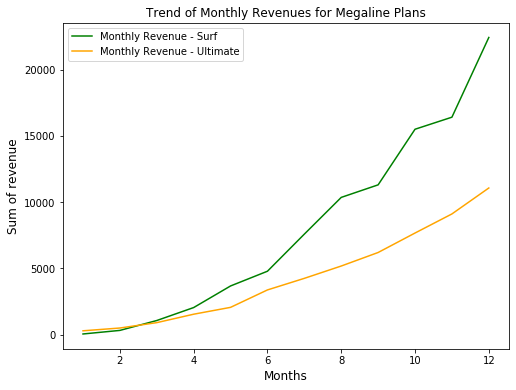

In [33]:
surf=Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="surf"].reset_index()
ultimate= Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="ultimate"].reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.plot(surf["month"], surf["monthly_revenue"],color="green", label="Monthly Revenue - Surf", )
plt.plot(ultimate["month"],ultimate["monthly_revenue"], color="orange", label="Monthly Revenue - Ultimate")
plt.legend()
plt.title("Trend of Monthly Revenues for Megaline Plans", fontdict={"size":12})
plt.ylabel("Sum of revenue", fontdict={"size":12})
plt.xlabel("Months", fontdict={"size":12})
plt.show()

From March 2018, the Surf plan continuously generated more monthly revenue than the Ultimate plan. 
The sum of monthly revenues for both plans (Surf and Ultimate) increased monotonically in 2018.
Both plans peaked in revenue in December 2018.

Total revenue for surf and ultimate plans in 2018

In [34]:
round(Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="surf"].sum(),2)[0]

95491.18

In [35]:
round(Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="ultimate"].sum(),2)[0]

52066.0

In 2018, the surf plan generated an annual revenue of about 95,491.18 dollars while the ultimate plan generated 
about 52,066.00 dollars as annual revenue.

Filtering surf dataframe 

In [36]:
surf_data = df_merged_new.query("plan_name == 'surf'")
surf_data.head()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name,monthly_revenue
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,20.00
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,20.00
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,90.09
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,60.00
5,1001,12,412.0,56.0,44.0,19369.18,19.0,surf,60.00


In [37]:
surf_data.describe()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,monthly_revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,428.749523,59.811825,31.159568,16558.283490,16.670693,60.706408
std,139.227939,2.468199,234.453150,32.017989,33.566717,8013.513327,7.847522,55.388042
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,8.000000,272.000000,39.000000,3.000000,11986.520000,12.000000,20.000000
50%,1245.000000,10.000000,425.000000,60.000000,24.000000,16829.310000,17.000000,40.360000
75%,1358.000000,11.000000,576.000000,79.000000,47.000000,20999.610000,21.000000,80.360000
max,1499.000000,12.000000,1510.000000,205.000000,266.000000,70931.590000,70.000000,590.370000


As the describe() method has produced the means, and standdard deviations. I will only calculate the variances for the surf plan.

In [38]:
print("Variances of the Surf plan:")
print("Total duration = {:.2f},Total calls = {:.2f},Total messages = {:.2f},Total data = {:.2f},Monthly revenue = \
{:.2f}".format(np.var(surf_data["total_duration"]),np.var(surf_data["total_calls"]), \
               np.var(surf_data["total_messages"]),np.var(surf_data["total_data_gb"]), \
               np.var(surf_data["monthly_revenue"])))

Variances of the Surf plan:
Total duration = 54933.33,Total calls = 1024.50,Total messages = 1126.01,Total data = 61.54,Monthly revenue = 3065.88


The Megaline customer(s) with the highest call duration, total number of calls, total data used, and highest 
revenue generation in a month are on the surf plan. The 75th percentile values and or the maximum values from the
description of the surt dataframe indicates a good number of clients on the surt plan exceeded their package limits and , hence, generated additional revenues.

On Average, a customer on the surf plan spends about 429 minutes on calls in a month with a standard deviation (sd) of about 234.45. The sd indicates the data points of customers on the surf plan are largely away from the mean. On average, a customer on the surf plan texts about 31 messages a month with a standard deviation of about 33.57 messages. A customer on the surf plan uses about 17 gigabytes of data in a month with standard deviation of about 7.8 gigabytes. This implies the data points with regards to usage of data on the surf plan are largely spread out. 
The average monthly revenue generated by a Surf plan client in a month is about 61 dollars with a sd of about 55 dollars.

Filtering ultimate plan dataframe

In [39]:
ultimate_data = df_merged_new.query("plan_name == 'ultimate'")
ultimate_data.head()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,70.0
19,1006,11,10.0,2.0,15.0,2068.37,3.0,ultimate,70.0
20,1006,12,59.0,9.0,139.0,32118.82,32.0,ultimate,84.0
26,1008,10,476.0,71.0,21.0,17106.99,17.0,ultimate,70.0
27,1008,11,446.0,63.0,37.0,23676.72,24.0,ultimate,70.0


In [40]:
ultimate_data.describe()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,monthly_revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,430.450000,60.626389,37.551389,17214.699694,17.306944,72.313889
std,150.915644,2.558495,240.508762,33.242994,34.767179,7851.897435,7.670108,11.395108
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,8.000000,260.000000,36.000000,7.000000,12666.955000,13.000000,70.000000
50%,1241.500000,10.000000,424.000000,61.000000,30.000000,16858.340000,17.000000,70.000000
75%,1401.000000,11.000000,565.250000,80.000000,61.000000,21014.527500,21.000000,70.000000
max,1497.000000,12.000000,1369.000000,191.000000,166.000000,46595.330000,46.000000,182.000000


As the describe() method has produced the means, and standdard deviations. I will only calculate the variances 
for the ultimate plan.

In [41]:
print("Variances of the Ultimate plan:")
print("Total duration = {:.2f},Total calls = {:.2f},Total messages = {:.2f},Total data = {:.2f},Monthly revenue = \
{:.2f}".format(np.var(ultimate_data["total_duration"]),np.var(ultimate_data["total_calls"]), \
               np.var(ultimate_data["total_messages"]),np.var(ultimate_data["total_data_gb"]), \
               np.var(ultimate_data["monthly_revenue"])))

Variances of the Ultimate plan:
Total duration = 57764.13,Total calls = 1103.56,Total messages = 1207.08,Total data = 58.75,Monthly revenue = 129.67


Even though  customers on the surf plan account for the highest in text, calls, data, and revenue in a month, 
on average, in a month, a customer on the ultimate plan texts more, uses more data, and generates comparatively
more revenue. Aside the maximum use of data that exceeds the package limit (46 GB), no customer on the 
ultimate plan exceeded the package limit in minutes and texting for the entire period. This indicates only a few 
clients on the ultimate plan added additional revenues. 

Compared to the Surf plan, customers on the ultimate plan have higher standard deviation with regards to minutes of calls, and total messages in a month. However, the standard deviation for monthly revenue for customers on the ultimate plan is very low. This implies data points for monthly revenue for the ultimate plan are very close to the mean. 

### Ploting histograms

Histogram for minutes spent

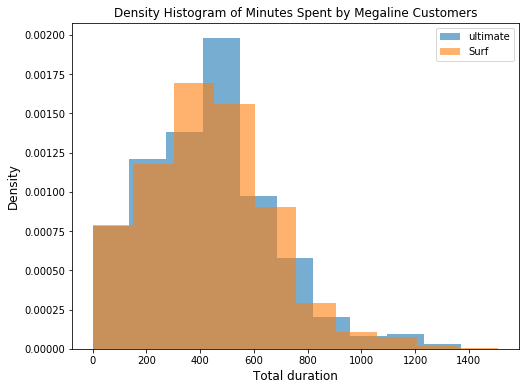

In [42]:
ultimate_data["total_duration"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_data["total_duration"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.legend()
plt.title("Density Histogram of Minutes Spent by Megaline Customers", fontdict={"size":12})
plt.xlabel("Total duration", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Relatively, the behavior of customers on both the ultimate and surf plan on monthly minutes follow a similar
trend. Majority of customers on both the ultimate and surf plan spend below 600 call minutes a month. The surf plan peaks around 400 call minutes while the ultimate plan peaks between 400 and 600 minutes. The distributions are both skewed a bit to the right (even though they look approximately normal). 

Plotting boxplot for each plan's total duration

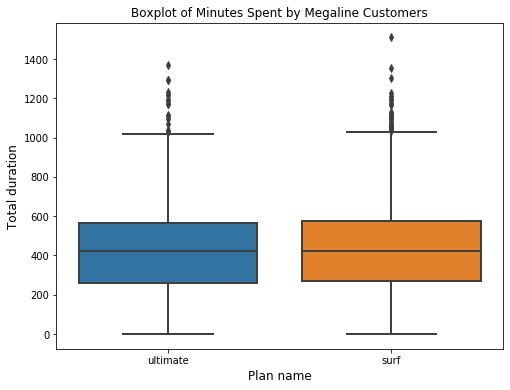

In [43]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="total_duration", data =df_merged_new, linewidth =2, ax=ax)
plt.title("Boxplot of Minutes Spent by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total duration", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

Each plan has outliers. There are calls that lasted more than 1000 minutes for both Surf and Ultimate. The Surf plan 
has a call duration above 1400 minutes.
The plans have almost the same (or same) median values.  

Histogram for total messages

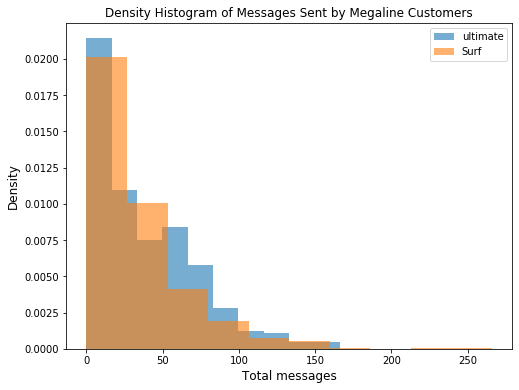

In [44]:
ultimate_data["total_messages"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_data["total_messages"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Messages Sent by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Total messages", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Again, in relative terms, customers on the surf plan behave similar to customers on the ultimate plan with regards to text messages. Majority of the customers text less. The distributions are positively skewed. 

Plotting boxplot for each plan's total messages

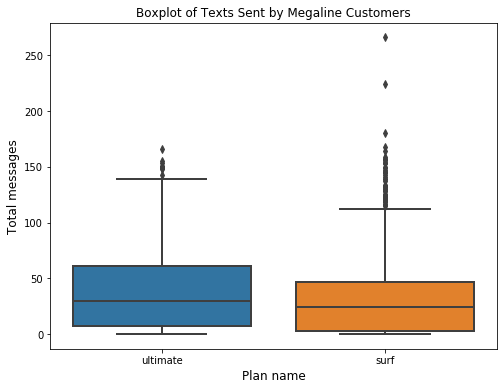

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="total_messages", data =df_merged_new, linewidth =2,ax=ax)
plt.title("Boxplot of Texts Sent by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total messages", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

The ultimate plan has comparatively few outliers with regards to messages sent. The ouliers are between 140 and 200 
messages for the ultimate plan. The surf plan has a lot of outliers from about 110 messages to more than 250 messages. The ultimate plan
has a higher interquartile range, i.e. wider middle half values of total messages, and a higher median compared 
to the surf plan.

Histogram for data usage

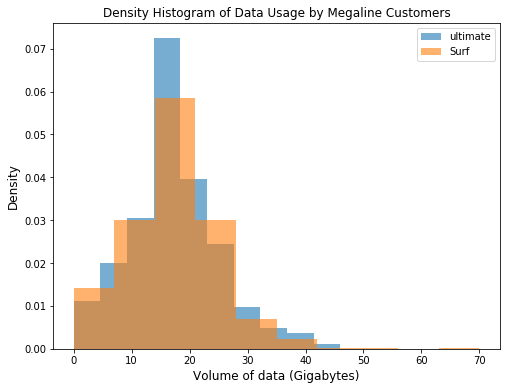

In [46]:
ultimate_data["total_data_gb"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_data["total_data_gb"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Data Usage by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Volume of data (Gigabytes)", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Like the other packages, considering data usage, customers on the surt plan behaves similar relative to customers 
on the ultimate plan. The peak of data usage are both around 20 gigabytes. The distributions are both approximately normal.

Plotting boxplot for each plan's data usage

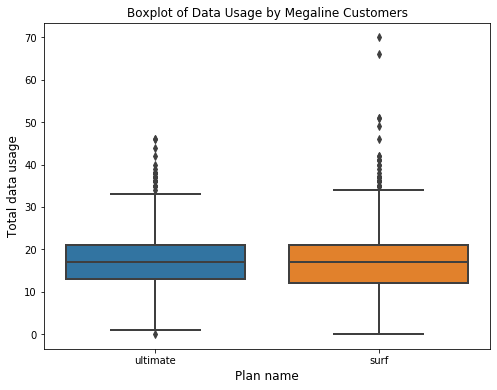

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="total_data_gb", data =df_merged_new, linewidth =2, ax=ax)
plt.title("Boxplot of Data Usage by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total data usage", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

The Surf plan has more outliers than the ultimate plan. The outliers for the ultimate plan falls between about 35 
and 50 gigabytes of data. The outliers for the Surf plan ranges from about 35 to more than 70 gigabytes of data. Both plans have a similar median.

### Interim Conclusion
- A good number of customers on the surf plan exceeds their package limits, thus, most surt plan clients generate
additional revenues. However, only few customers patronizing the ultimate data plan exceed their package limits, 
hence, only few ultimate customers generate additional revenues. 
- Relatively, surf plan customers behave like ultimate plan customers. This results in surf plan customers exceeding their package limits.

- In total, surf plan customers generate more revenue than ulimate plan clients. However, on average, in a month,a customer on the ultimate plan generates more revenue than a customer on the surf plan. 

## Step 4: Testing the hypotheses

### Hypothesis  test 1
`Claim: The average revenue from users of Ultimate and Surf calling plans differs`

Previewing revenue distributions

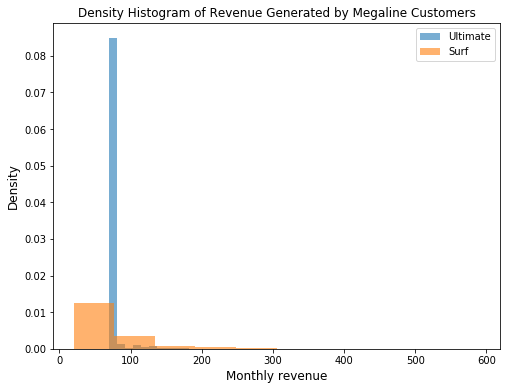

In [48]:
ultimate_data["monthly_revenue"].plot(kind="hist",label="Ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_data["monthly_revenue"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Revenue Generated by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Monthly revenue", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

The histogram indicates that are outliers in the revenue distribution in the upper limits. 
Hence, the need to remove remove them.

Filtering upper limit outliers from surf and ulitmate dataframes

In [49]:
Q1 = surf_data["monthly_revenue"].quantile(0.25)
Q3 = surf_data["monthly_revenue"].quantile(0.75)
IQR = Q3 - Q1

filter_surf = surf_data[surf_data["monthly_revenue"] < (Q3 + 1.5 * IQR)]
filter_surf.head()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name,monthly_revenue
1,1001,8,182.0,27.0,30.0,6919.15,7.0,surf,20.00
2,1001,9,315.0,49.0,44.0,13314.82,14.0,surf,20.00
3,1001,10,393.0,65.0,53.0,22330.49,22.0,surf,90.09
4,1001,11,426.0,64.0,36.0,18504.30,19.0,surf,60.00
5,1001,12,412.0,56.0,44.0,19369.18,19.0,surf,60.00


In [50]:
q1 = surf_data["monthly_revenue"].quantile(0.25)
q3 = surf_data["monthly_revenue"].quantile(0.75)
iqr = q3 - q1

filter_ultimate = ultimate_data[ultimate_data["monthly_revenue"] < (q3 + 1.5 * iqr)]
filter_ultimate.head()

,user_id,month,total_duration,total_calls,total_messages,total_data_mb,total_data_gb,plan_name,monthly_revenue
0,1000,12,124.0,16.0,11.0,1901.47,2.0,ultimate,70.0
19,1006,11,10.0,2.0,15.0,2068.37,3.0,ultimate,70.0
20,1006,12,59.0,9.0,139.0,32118.82,32.0,ultimate,84.0
26,1008,10,476.0,71.0,21.0,17106.99,17.0,ultimate,70.0
27,1008,11,446.0,63.0,37.0,23676.72,24.0,ultimate,70.0


Replotting Hisgram with filtered data

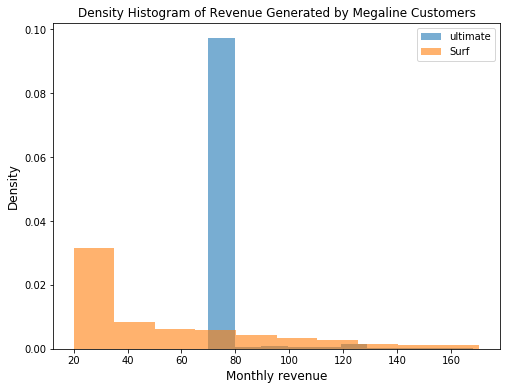

In [51]:
filter_ultimate["monthly_revenue"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
filter_surf["monthly_revenue"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Revenue Generated by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Monthly revenue", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

The above density histograms show clearly that majority of the surf customers exceed their package limits 
as their revenue stream is more spread out (above the 20.00 dollars limit). However, majority of revenue from 
the ultimate plan customers fall between 70.00 and 80.00 dollars (just around the 70.00 dollars limit).


The revenue streams are not normally distributed and the samples are unpaired. Therefore, one would 
argue that a Mann-Whitney U test should be used to test if the sample distributions are the same. But the 
project question demands a test of means, hence I would use t-test to test the hypotheses.

Hypotheses:

H0: The average revenue from users of Ultimate and Surf calling plans are the same (null hypothesis).

H1: The average revenue from users of Ultimate and Surf calling plans differs (alternative hypothesis).

In [52]:
from scipy import stats as st

print("Average revenue:")
print("Ultimate = ",round(np.mean(filter_ultimate["monthly_revenue"]),0))
print("Surf =",round(np.mean(filter_surf["monthly_revenue"]),0))
print()


alpha = .05 # critical statistical significance level
results = st.ttest_ind(filter_surf["monthly_revenue"], filter_ultimate["monthly_revenue"],equal_var=False)

print('p-value: {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Average revenue:
Ultimate =  72.0
Surf = 52.0

p-value: 0.0000
We reject the null hypothesis


The test provides evidence to support the claim that the average revenue from users of Ultimate and Surf calling plans differs 

### Hypothesis  test 2
H0: The average revenue from users in NY-NJ area is not different from that of the users from other regions.

H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.

Initially, I will Merge the "city" column in the user dataframe with the merged dataframe. 
I would proceed to filter the "revenue from users in NY-NJ area" and revenue from users of other regions.
I would then test the hypothesis with these samples.

In [53]:
city_area = df_users[["user_id","city"]]
cities_data = df_merged_new.merge(city_area, on="user_id")

g1 = cities_data["monthly_revenue"].quantile(0.25)
g3 = cities_data["monthly_revenue"].quantile(0.75)
igr = g3 - g1

filter_cities_data = cities_data[cities_data["monthly_revenue"] < (q3 + 1.5 * igr)]

ny_nj_area = filter_cities_data.query('city== "New York-Newark-Jersey City, NY-NJ-PA MSA"')
not_ny_nj_area = filter_cities_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')


print("Variance:")
print("NY-NJ Area = ",round(np.var(ny_nj_area["monthly_revenue"]),0))
print("Other Area =",round(np.var(not_ny_nj_area["monthly_revenue"]),0))
print()

print("Mean:")
print("NY-NJ Area = ",round(np.mean(ny_nj_area["monthly_revenue"]),0))
print("Other Area =",round(np.mean(not_ny_nj_area["monthly_revenue"]),0))
print()
      

alpha = .05 # critical statistical significance level

result = st.ttest_ind(ny_nj_area["monthly_revenue"], not_ny_nj_area["monthly_revenue"],equal_var=False)

print('p-value: {:.4f}'.format(result.pvalue))

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Variance:
NY-NJ Area =  1087.0
Other Area = 908.0

Mean:
NY-NJ Area =  54.0
Other Area = 58.0

p-value: 0.0473
We reject the null hypothesis


At 5% significance level, the test provides evidence to support the claim that the average revenue from users in NY-NJ area is different from that of the users from other regions. However, at 1% level, there are no significant differences.

## Step 5: Overall conclusion

- Aside January and February 2018, the Surf plan always generated higher monthly revenues than the ultimate plan.

- The monthly revenues for both surf and ultimate plans increased monotonically in 2018.

- A good number of customers on the surf plan exceed their package limits, thus, most surt plan clients generate
additional revenues. However, only few customers patronizing the ultimate data plan exceed their package limits, 
hence, only few ultimate customers generate additional revenues. 

- Relatively, surf plan customers behaves like ultimate plan customers. This results in surf plan customers 
exceeding their package limits.

- In total, surf plan customers generate more annual revenue than ulimate plan clients (about 95,491.18 dollars generated from surf plan clients while the ultimate plan clients generated about 52,066.00 dollars). However, on average, in a month, a customer on the ultimate plan generates more revenue than a customer on the surf plan.

- The average revenue from users of Ultimate and Surf calling plans differs.

- The average revenue from users in NY-NJ area is different from that of the users from other regions.

- My recommendation to the commercial department of Megaline is to adjust their advertising budget to favour the surf plan.
